In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv('train_v9rqX0R.csv')
test = pd.read_csv('test_AbJTz2l.csv')

In [132]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [133]:
train.shape

(8523, 12)

In [134]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [135]:
train['Item_Weight'].value_counts()

Item_Weight
12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
8.920      2
6.520      1
9.420      1
7.685      1
5.400      1
Name: count, Length: 415, dtype: int64

In [136]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [137]:
cat_cols = train.select_dtypes(include='object').columns
num_cols = train.select_dtypes(exclude='object').columns

print("Categorical:", cat_cols)
print("Numerical:", num_cols)

Categorical: Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')
Numerical: Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')


Train Data Missing Values:


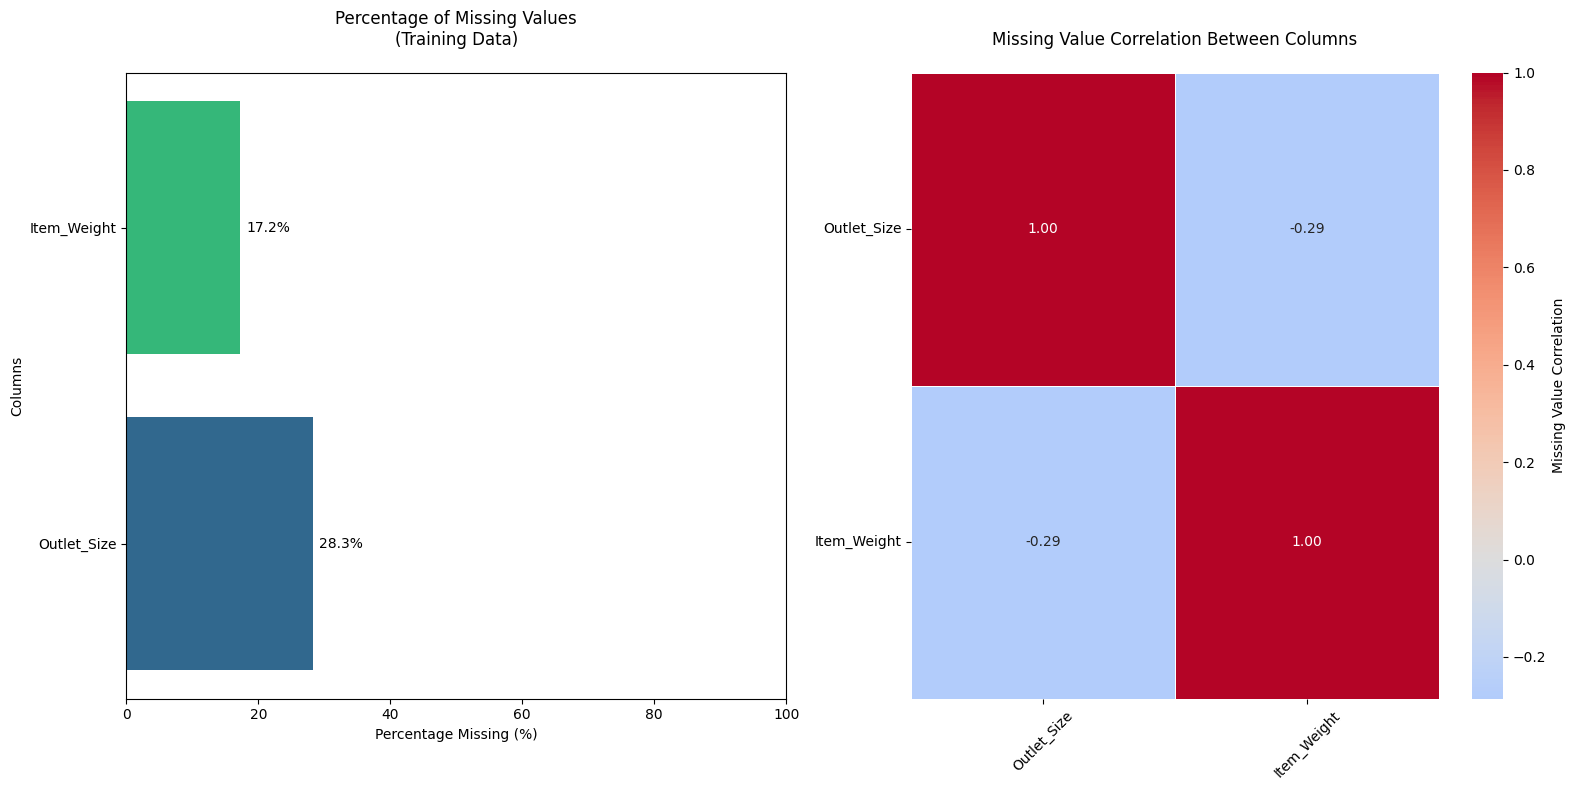


Test Data Missing Values:


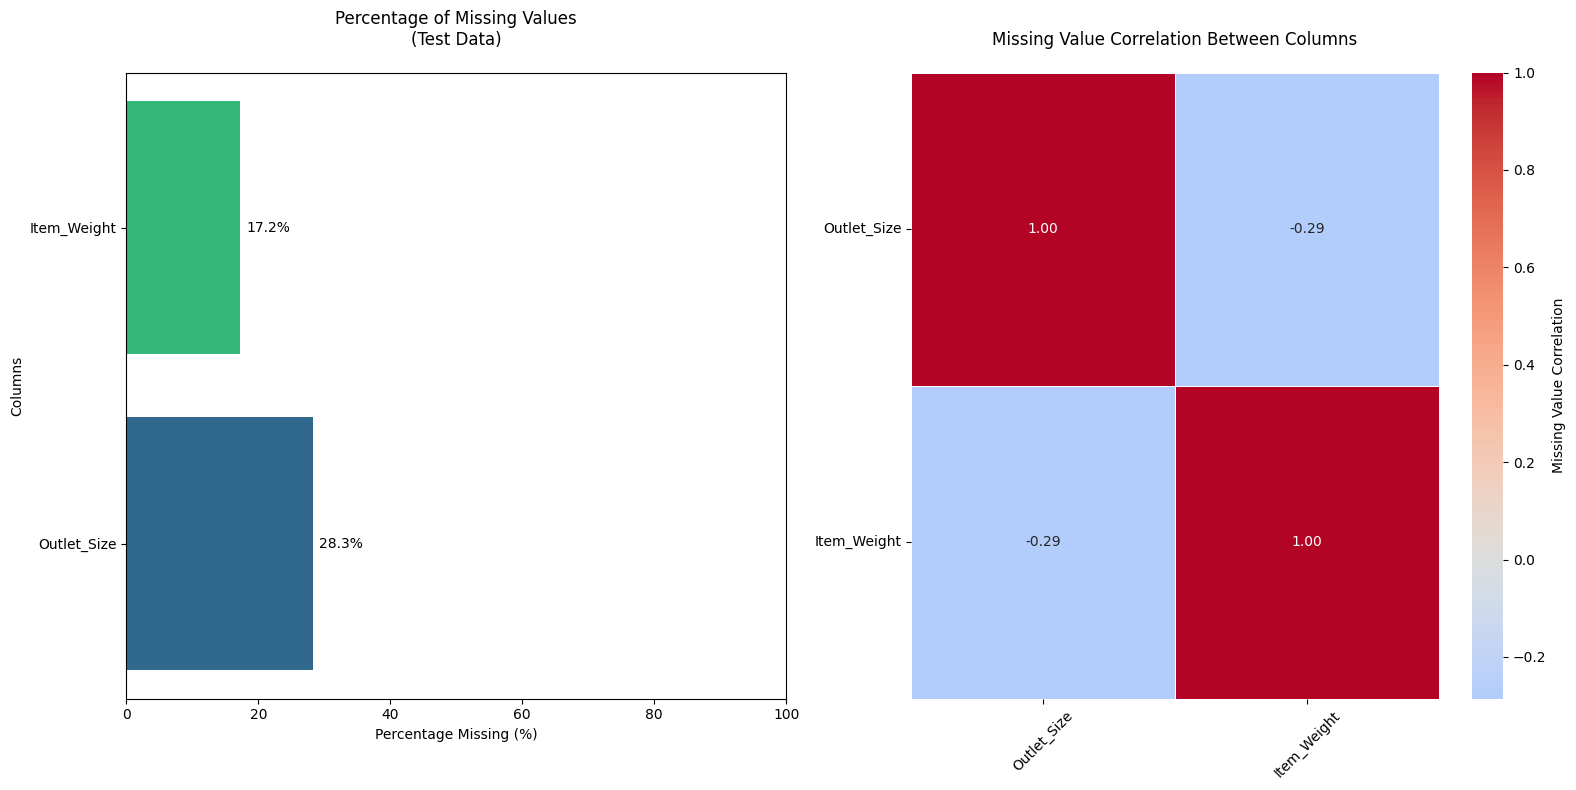

In [138]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def enhanced_missing_analysis(df, title="Missing Value Analysis"):
    # Calculate missing values
    missing = df.isnull().sum()
    missing_percent = missing / len(df) * 100
    
    # Create a summary dataframe
    missing_df = pd.DataFrame({
        'Missing Values': missing,
        'Percentage (%)': missing_percent
    }).sort_values('Percentage (%)', ascending=False)
    
    # Filter only columns with missing values
    missing_df = missing_df[missing_df['Missing Values'] > 0]
    
    # Create figure with two subplots
    plt.figure(figsize=(16, 8))
    
    # First subplot: Bar chart of missing values
    plt.subplot(1, 2, 1)
    bars = plt.barh(missing_df.index, missing_df['Percentage (%)'], 
                   color=sns.color_palette('viridis', len(missing_df)))
    plt.title(f'Percentage of Missing Values\n({title})', pad=20)
    plt.xlabel('Percentage Missing (%)')
    plt.ylabel('Columns')
    plt.xlim(0, 100)
    
    # Add value labels to bars
    for bar in bars:
        width = bar.get_width()
        plt.text(width + 1, bar.get_y() + bar.get_height()/2, 
                f'{width:.1f}%', 
                va='center', ha='left')
    
    # Second subplot: Heatmap of missing values
    plt.subplot(1, 2, 2)
    # Create a binary matrix of missing values (1 = missing, 0 = present)
    missing_matrix = df[missing_df.index].isnull().astype(int)
    
    # Calculate correlation of missingness between columns
    missing_corr = missing_matrix.corr()
    
    # Plot heatmap
    sns.heatmap(missing_corr, cmap='coolwarm', center=0,
               annot=True, fmt=".2f", linewidths=.5,
               cbar_kws={'label': 'Missing Value Correlation'})
    plt.title('Missing Value Correlation Between Columns', pad=20)
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    
    plt.tight_layout()
    plt.show()
    
    return missing_df

# Apply to train and test data
print("Train Data Missing Values:")
train_missing = enhanced_missing_analysis(train, "Training Data")

print("\nTest Data Missing Values:")
test_missing = enhanced_missing_analysis(test, "Test Data")

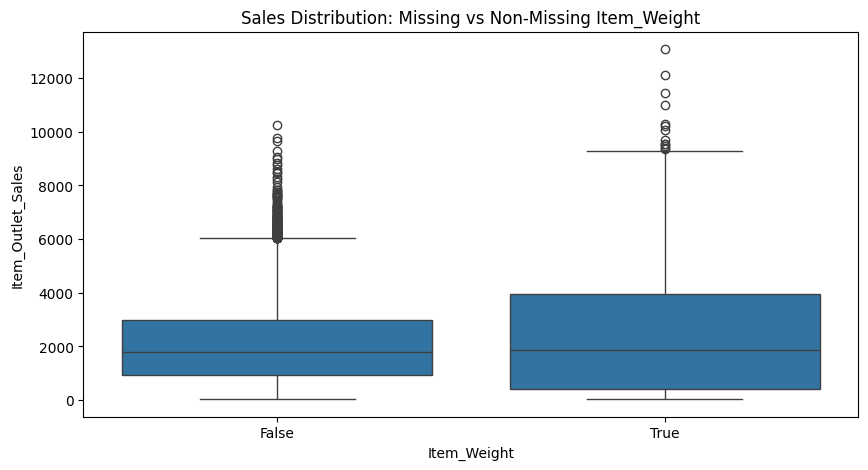

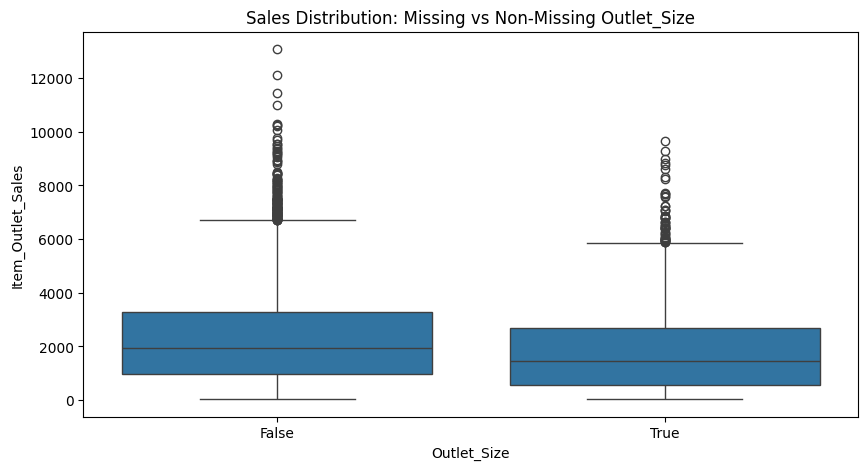

In [139]:
# Compare sales for rows with/without missing Item_Weight
plt.figure(figsize=(10, 5))
sns.boxplot(x=train['Item_Weight'].isnull(), y=train['Item_Outlet_Sales'])
plt.title("Sales Distribution: Missing vs Non-Missing Item_Weight")
plt.show()

# Compare sales for rows with/without missing Outlet_Size
plt.figure(figsize=(10, 5))
sns.boxplot(x=train['Outlet_Size'].isnull(), y=train['Item_Outlet_Sales'])
plt.title("Sales Distribution: Missing vs Non-Missing Outlet_Size")
plt.show()

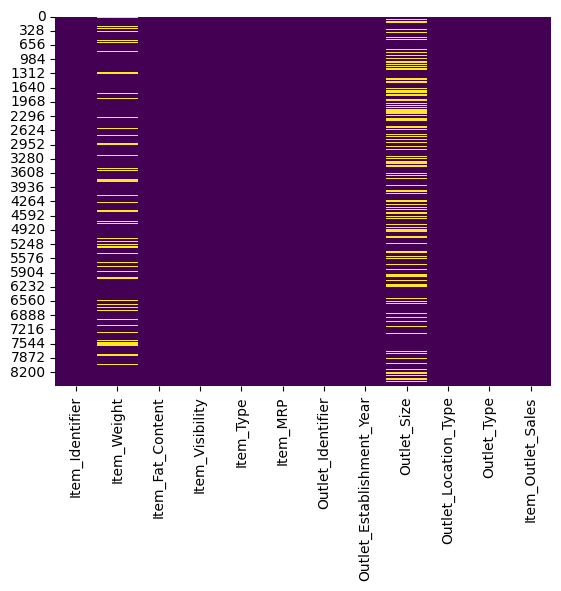

In [140]:
train.isnull().sum()
sns.heatmap(train.isnull(), cbar=False, cmap="viridis")
plt.show()

In [141]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [142]:
# Fill Item_Weight using median per Item_Identifier
train['Item_Weight'] = train.groupby('Item_Identifier')['Item_Weight'].transform(
    lambda x: x.fillna(x.median())
)

# If still missing (rare), use overall median
train['Item_Weight'].fillna(train['Item_Weight'].median(), inplace=True)


C:\Users\sapnab\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\sapnab\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\sapnab\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\sapnab\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\sapnab\AppData\Local\Temp\ipykernel_18716\2810204023.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using a

In [143]:
# Impute based on Outlet_Type
train['Outlet_Size'] = train.groupby('Outlet_Type')['Outlet_Size'].transform(
    lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else x
)

# If still missing, use overall mode
train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0], inplace=True)


C:\Users\sapnab\AppData\Local\Temp\ipykernel_18716\2807112443.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0], inplace=True)


In [144]:
train.isnull().sum()


Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

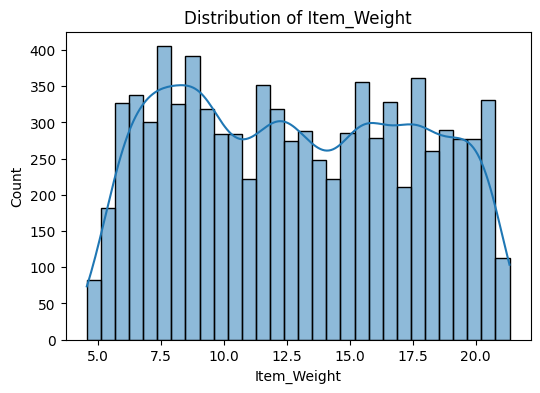

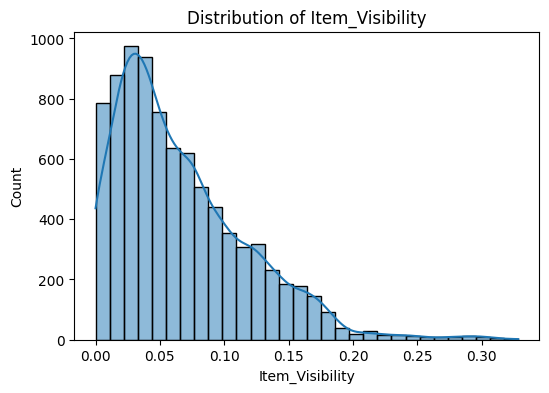

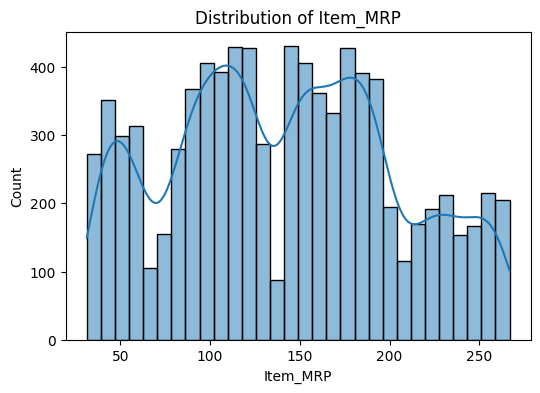

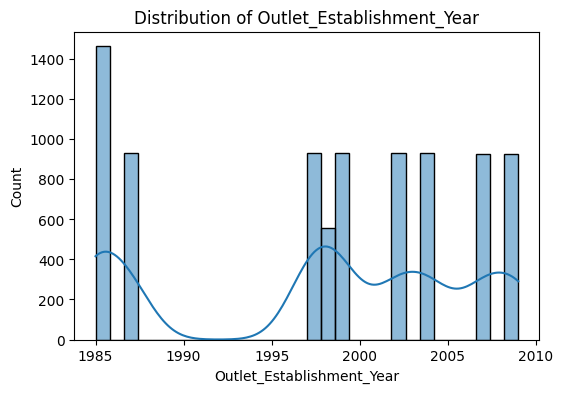

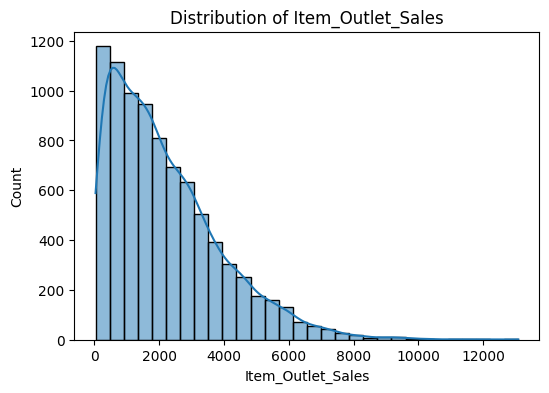

In [145]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(train[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()


In [146]:
train['Item_Visibility'] = train['Item_Visibility'].replace(0, np.nan)
train['Item_Visibility'].fillna(train['Item_Visibility'].median(), inplace=True)
train['Item_Visibility_Log'] = np.log1p(train['Item_Visibility'])

C:\Users\sapnab\AppData\Local\Temp\ipykernel_18716\1406467723.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Item_Visibility'].fillna(train['Item_Visibility'].median(), inplace=True)


In [147]:
train['MRP_Band'] = pd.qcut(train['Item_MRP'], 4, labels=['Low','Medium','High','Very_High'])


In [148]:
train['Outlet_Age'] = 2013 - train['Outlet_Establishment_Year']


In [149]:
train['Item_Outlet_Sales_Log'] = np.log1p(train['Item_Outlet_Sales'])


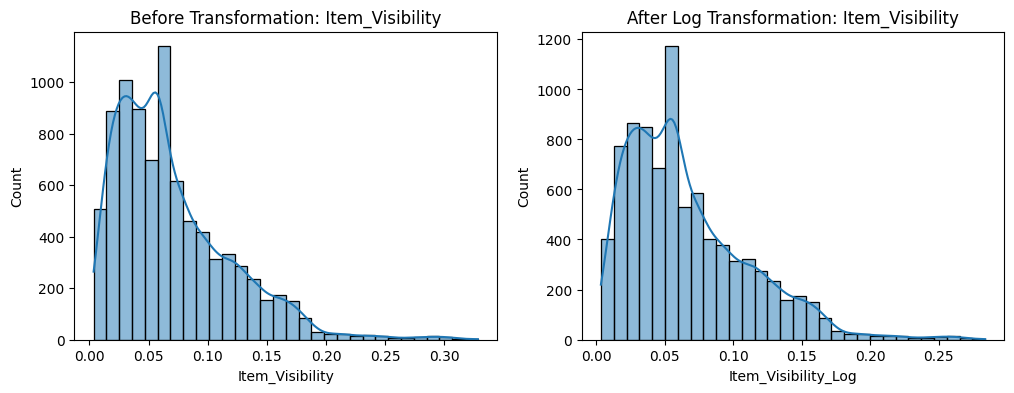

In [150]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))

sns.histplot(train['Item_Visibility'], bins=30, kde=True, ax=axes[0])
axes[0].set_title("Before Transformation: Item_Visibility")

sns.histplot(train['Item_Visibility_Log'], bins=30, kde=True, ax=axes[1])
axes[1].set_title("After Log Transformation: Item_Visibility")

plt.show()


In [151]:
from scipy.stats import skew

print("Skewness before:", skew(train['Item_Visibility']))
print("Skewness after :", skew(train['Item_Visibility_Log']))

print("Sales skewness before:", skew(train['Item_Outlet_Sales']))
print("Sales skewness after :", skew(train['Item_Outlet_Sales_Log']))


Skewness before: 1.3106402892979916
Skewness after : 1.1568097290723804
Sales skewness before: 1.1773233539676375
Sales skewness after : -0.8821104109396486


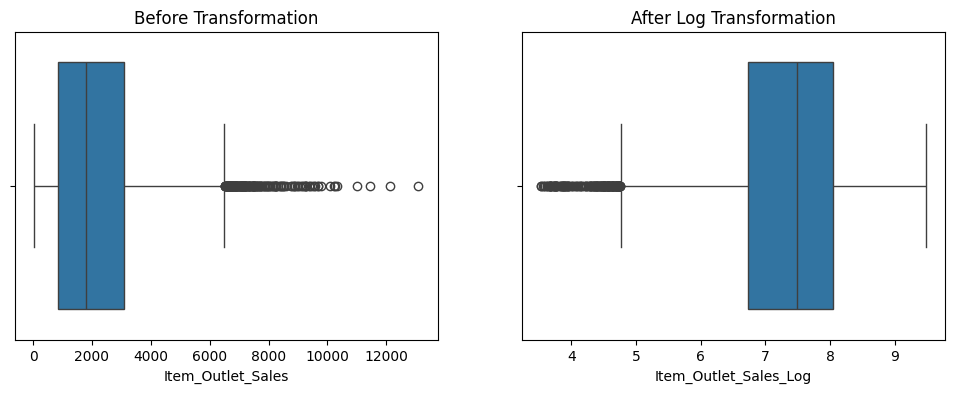

In [152]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))

sns.boxplot(x=train['Item_Outlet_Sales'], ax=axes[0])
axes[0].set_title("Before Transformation")

sns.boxplot(x=train['Item_Outlet_Sales_Log'], ax=axes[1])
axes[1].set_title("After Log Transformation")

plt.show()


In [153]:
print("Correlation before:", train['Item_Visibility'].corr(train['Item_Outlet_Sales']))
print("Correlation after :", train['Item_Visibility_Log'].corr(train['Item_Outlet_Sales']))


Correlation before: -0.1341607932486521
Correlation after : -0.13152668441772836


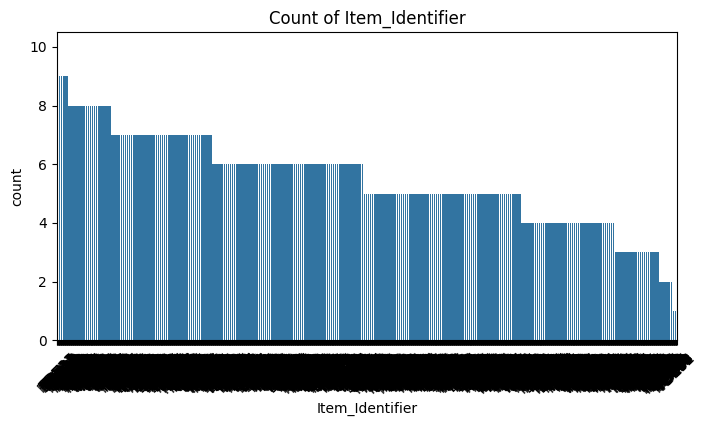

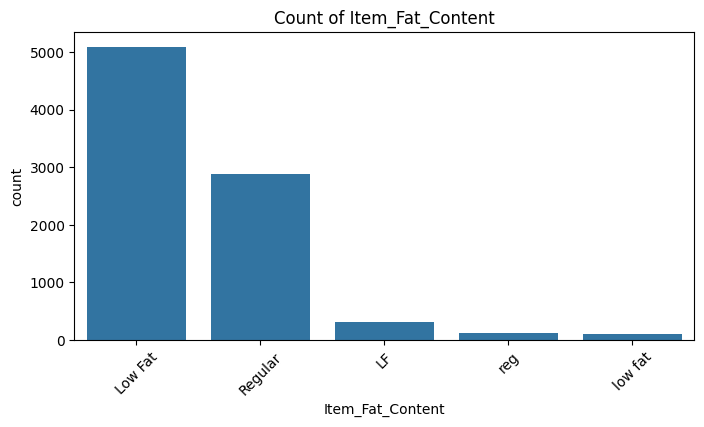

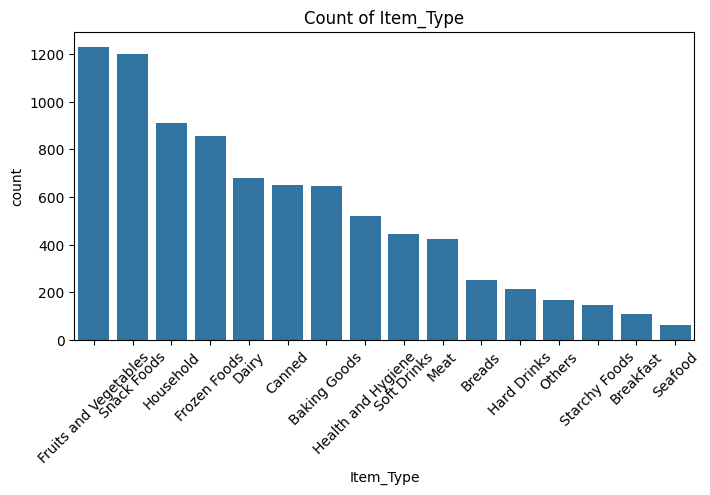

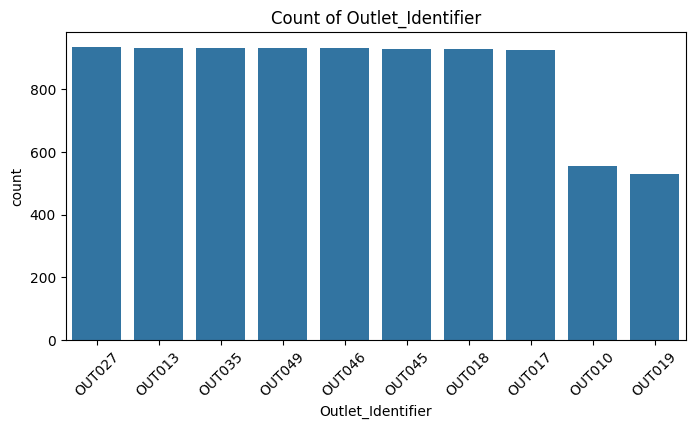

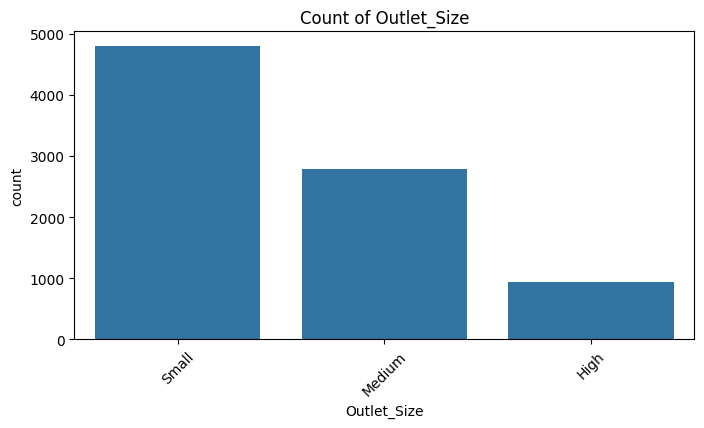

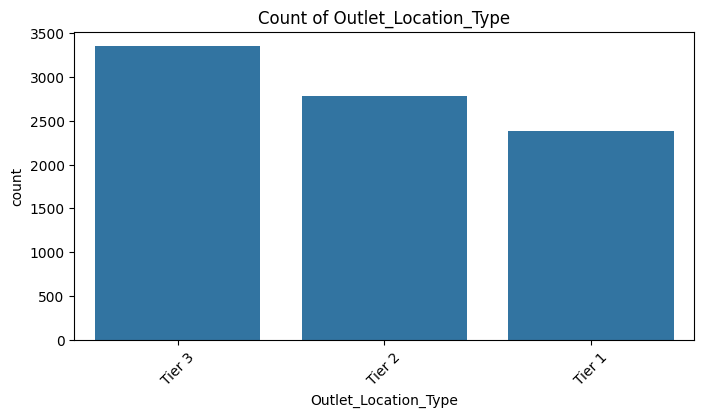

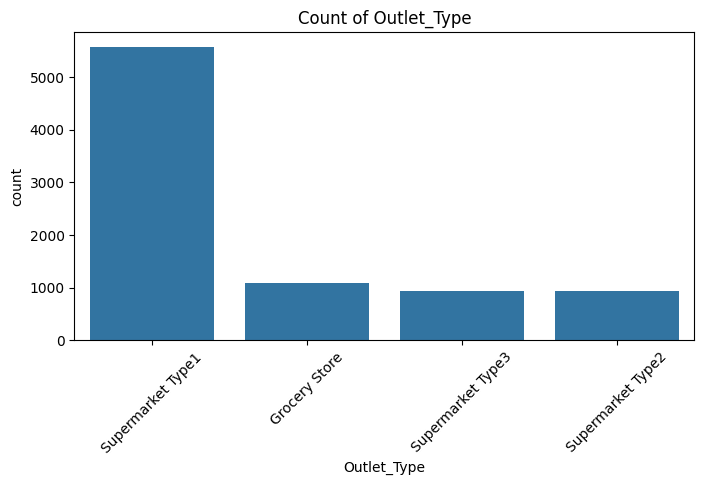

In [154]:
for col in cat_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(x=train[col], order=train[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f"Count of {col}")
    plt.show()


In [155]:
train['Item_Identifier'].value_counts()

Item_Identifier
FDW13    10
FDG33    10
FDX31     9
FDT07     9
NCY18     9
         ..
FDO33     1
FDK57     1
FDT35     1
FDN52     1
FDE52     1
Name: count, Length: 1559, dtype: int64

In [156]:
train['Item_Identifier'].unique

<bound method Series.unique of 0       FDA15
1       DRC01
2       FDN15
3       FDX07
4       NCD19
        ...  
8518    FDF22
8519    FDS36
8520    NCJ29
8521    FDN46
8522    DRG01
Name: Item_Identifier, Length: 8523, dtype: object>

In [157]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Item_Visibility_Log', 'MRP_Band',
       'Outlet_Age', 'Item_Outlet_Sales_Log'],
      dtype='object')

In [158]:
drinks_types = ['Soft Drinks', 'Hard Drinks']
non_consumable_types = ['Household', 'Health and Hygiene', 'Others']

def to_item_category(t):
    if t in drinks_types:
        return 'Drinks'
    if t in non_consumable_types:
        return 'Non-Consumable'
    return 'Food'  # everything else is edible food

# make new column from Item_Type
train['Item_Category'] = train['Item_Type'].apply(to_item_category)

# (optional) set fat content for non-consumables
train.loc[train['Item_Category'] == 'Non-Consumable', 'Item_Fat_Content'] = 'Non-Edible'

# quick sanity checks
print(train['Item_Category'].value_counts())
print(pd.crosstab(train['Item_Type'], train['Item_Category']))

Item_Category
Food              6265
Non-Consumable    1599
Drinks             659
Name: count, dtype: int64
Item_Category          Drinks  Food  Non-Consumable
Item_Type                                          
Baking Goods                0   648               0
Breads                      0   251               0
Breakfast                   0   110               0
Canned                      0   649               0
Dairy                       0   682               0
Frozen Foods                0   856               0
Fruits and Vegetables       0  1232               0
Hard Drinks               214     0               0
Health and Hygiene          0     0             520
Household                   0     0             910
Meat                        0   425               0
Others                      0     0             169
Seafood                     0    64               0
Snack Foods                 0  1200               0
Soft Drinks               445     0               0
Starchy

In [159]:
train['Item_Type'].value_counts()

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

In [160]:
train['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat       3612
Regular       2889
Non-Edible    1599
LF             222
reg            117
low fat         84
Name: count, dtype: int64

In [161]:
train['Item_Identifier'].value_counts()

Item_Identifier
FDW13    10
FDG33    10
FDX31     9
FDT07     9
NCY18     9
         ..
FDO33     1
FDK57     1
FDT35     1
FDN52     1
FDE52     1
Name: count, Length: 1559, dtype: int64

In [162]:
train['Item_Fat_Content'] = train['Item_Fat_Content'].replace({
    'LF':'Low Fat',
    'low fat':'Low Fat',
    'reg':'Regular'
})

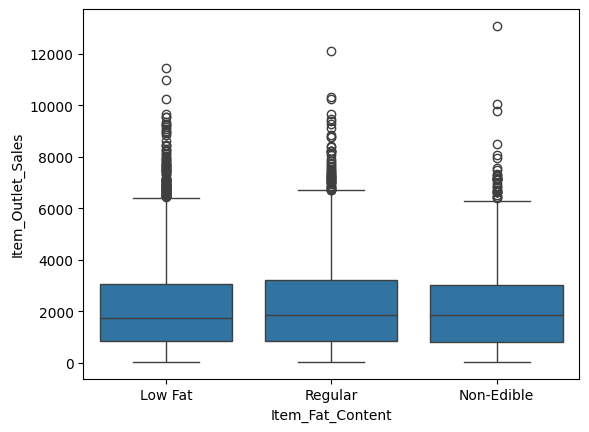

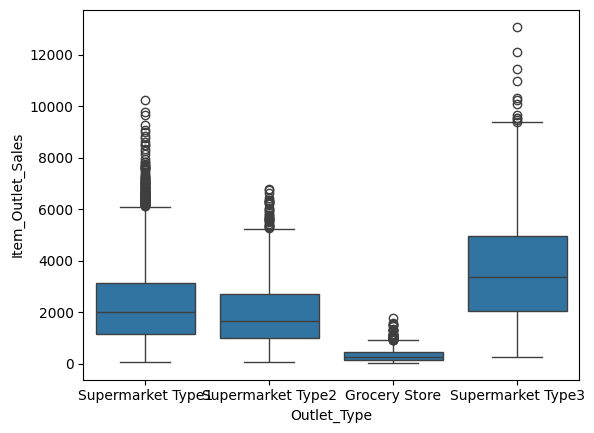

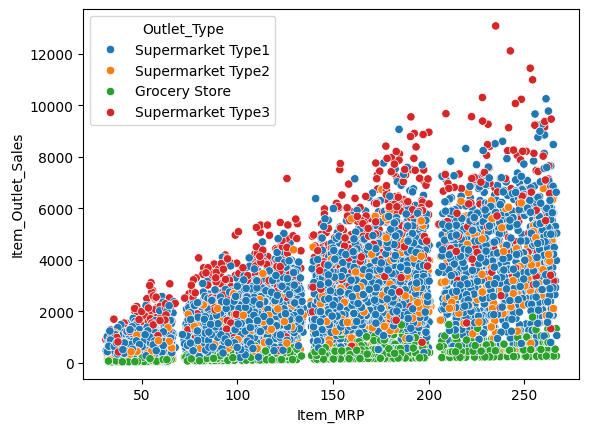

In [163]:
sns.boxplot(x="Item_Fat_Content", y="Item_Outlet_Sales", data=train)
plt.show()

sns.boxplot(x="Outlet_Type", y="Item_Outlet_Sales", data=train)
plt.show()

sns.scatterplot(x="Item_MRP", y="Item_Outlet_Sales", hue="Outlet_Type", data=train)
plt.show()


In [164]:
train['MRP_Band'] = pd.qcut(train['Item_MRP'], 4, labels=['Low','Medium','High','Very_High'])

In [165]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Item_Visibility_Log', 'MRP_Band',
       'Outlet_Age', 'Item_Outlet_Sales_Log', 'Item_Category'],
      dtype='object')

In [166]:
drinks = {'Soft Drinks','Hard Drinks'}
noncons = {'Household','Health and Hygiene','Others'}

def to_category(t):
    if t in drinks: return 'Drinks'
    if t in noncons: return 'Non-Consumable'
    return 'Food'

train['Item_Category'] = train['Item_Type'].apply(to_category)


In [167]:
train['Item_Category'].value_counts()

Item_Category
Food              6265
Non-Consumable    1599
Drinks             659
Name: count, dtype: int64

In [168]:
# s['Item_Type'].value_counts()

In [169]:
# # Clean, explicit mapping
# type_to_cat = {
#     'Soft Drinks': 'Drinks',
#     'Hard Drinks': 'Drinks',
#     'Household': 'Non-Consumable',
#     'Health and Hygiene': 'Non-Consumable',
#     'Others': 'Non-Consumable',
# }

# # Anything not in the dict (e.g., Dairy, Meat, Breads, etc.) becomes Food
# train['Item_Category'] = train['Item_Type'].map(type_to_cat).fillna('Food')


In [170]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Item_Visibility_Log', 'MRP_Band',
       'Outlet_Age', 'Item_Outlet_Sales_Log', 'Item_Category'],
      dtype='object')

In [171]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Ordinal Encoding for Outlet_Location_Type
location_map = {'Tier 1': 0, 'Tier 2': 1, 'Tier 3': 2}
train['Outlet_Location_Type'] = train['Outlet_Location_Type'].map(location_map)

# OneHotEncoding for nominal features
ohe_cols = ['Outlet_Type', 'Outlet_Size', 'Item_Fat_Content', 'Item_Category']

train = pd.get_dummies(train, columns=ohe_cols,drop_first=True)


In [172]:
print("Train shape:", train.shape)
print("Columns:", train.columns)

Train shape: (8523, 22)
Columns: Index(['Item_Identifier', 'Item_Weight', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Location_Type', 'Item_Outlet_Sales', 'Item_Visibility_Log',
       'MRP_Band', 'Outlet_Age', 'Item_Outlet_Sales_Log',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3', 'Outlet_Size_Medium',
       'Outlet_Size_Small', 'Item_Fat_Content_Non-Edible',
       'Item_Fat_Content_Regular', 'Item_Category_Food',
       'Item_Category_Non-Consumable'],
      dtype='object')


In [173]:
train['Item_Type'].value_counts()

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

In [174]:
# pip install xgboost

In [177]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Location_Type', 'Item_Outlet_Sales', 'Item_Visibility_Log',
       'MRP_Band', 'Outlet_Age', 'Item_Outlet_Sales_Log',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3', 'Outlet_Size_Medium',
       'Outlet_Size_Small', 'Item_Fat_Content_Non-Edible',
       'Item_Fat_Content_Regular', 'Item_Category_Food',
       'Item_Category_Non-Consumable'],
      dtype='object')

In [178]:
train['Item_Fat_Content_Regular'].value_counts()

Item_Fat_Content_Regular
False    5517
True     3006
Name: count, dtype: int64

In [184]:
test=pd.read_csv('test_preprocessed.csv')

In [185]:
test.columns

Index(['Unnamed: 0', 'Item_Identifier', 'Item_Weight', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Location_Type',
       'Item_Visibility_Log', 'MRP_Band', 'Outlet_Age',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3', 'Outlet_Size_Medium',
       'Outlet_Size_Small', 'Item_Fat_Content_Non-Edible',
       'Item_Fat_Content_Regular', 'Item_Category_Food',
       'Item_Category_Non-Consumable'],
      dtype='object')

In [186]:
# Features to use
features = [
    'Item_Weight', 'Item_Visibility', 'Item_MRP',
    'Outlet_Establishment_Year', 'Outlet_Age', 'Item_Visibility_Log',
    'MRP_Band',
    'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
    'Outlet_Type_Supermarket Type3',
    'Outlet_Size_Medium', 'Outlet_Size_Small',
    'Item_Fat_Content_Non-Edible', 'Item_Fat_Content_Regular',
    'Item_Category_Food', 'Item_Category_Non-Consumable'
]

target = 'Item_Outlet_Sales'

X_train = train[features]
y_train = train[target]

X_test = test[features]   # <-- from your provided test set


In [191]:
import pandas as pd
from pandas.api.types import CategoricalDtype

# 1) Define the exact order you intended (edit if your bands differ)
mrp_order = ["Very Low", "Low", "Medium", "High", "Very High"]
band_dtype = CategoricalDtype(categories=mrp_order, ordered=True)

# 2) Apply SAME dtype to both train & test so codes align
train['MRP_Band'] = train['MRP_Band'].astype(band_dtype)
test['MRP_Band']  = test['MRP_Band'].astype(band_dtype)

# 3) Convert to integer codes (no 'category' dtype remains)
train['MRP_Band'] = train['MRP_Band'].cat.codes.astype('int16')
test['MRP_Band']  = test['MRP_Band'].cat.codes.astype('int16')


In [192]:
train['MRP_Band'].replace(-1, 0, inplace=True)
test['MRP_Band'].replace(-1, 0, inplace=True)


C:\Users\sapnab\AppData\Local\Temp\ipykernel_18716\2568456002.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['MRP_Band'].replace(-1, 0, inplace=True)
C:\Users\sapnab\AppData\Local\Temp\ipykernel_18716\2568456002.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [193]:
feature_cols = [
    'Item_Weight','Item_Visibility','Item_MRP',
    'Outlet_Establishment_Year','Outlet_Age','Item_Visibility_Log','MRP_Band',
    'Outlet_Type_Supermarket Type1','Outlet_Type_Supermarket Type2',
    'Outlet_Type_Supermarket Type3','Outlet_Size_Medium','Outlet_Size_Small',
    'Item_Fat_Content_Non-Edible','Item_Fat_Content_Regular',
    'Item_Category_Food','Item_Category_Non-Consumable'
]

# Find any troublemakers
bad_train = train[feature_cols].select_dtypes(include=['object','category']).columns.tolist()
bad_test  = test[feature_cols].select_dtypes(include=['object','category']).columns.tolist()
print("Non-numeric in TRAIN:", bad_train)
print("Non-numeric in TEST :", bad_test)


Non-numeric in TRAIN: []
Non-numeric in TEST : []


In [194]:
from xgboost import XGBRegressor

X_train = train[feature_cols]
y_train = train['Item_Outlet_Sales']
X_test  = test[feature_cols]

model = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=8,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)
model.fit(X_train, y_train)
preds = model.predict(X_test)


In [195]:
preds

array([1366.4211, 1301.482 ,  973.0633, ..., 1895.8965, 4576.706 ,
       1768.1744], shape=(5681,), dtype=float32)

In [196]:
# ---- FINAL FEATURES (all numeric / dummies only; NO leakage) ----
feature_cols = [
    'Item_Weight', 'Item_Visibility', 'Item_MRP',
    'Outlet_Establishment_Year', 'Outlet_Age', 'Item_Visibility_Log',
    'MRP_Band',  # <- must be ordinal-coded (int) as we fixed earlier

    # OHE columns you created (int/bool is fine)
    'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
    'Outlet_Type_Supermarket Type3',
    'Outlet_Size_Medium', 'Outlet_Size_Small',
    'Item_Fat_Content_Non-Edible', 'Item_Fat_Content_Regular',
    'Item_Category_Food', 'Item_Category_Non-Consumable'
]

target = 'Item_Outlet_Sales'

X_train = train[feature_cols].copy()
y_train = train[target].copy()
X_test  = test[feature_cols].copy()

# (Optional but tidy) cast dummies to small ints
dummy_cols = [
    'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
    'Outlet_Type_Supermarket Type3', 'Outlet_Size_Medium', 'Outlet_Size_Small',
    'Item_Fat_Content_Non-Edible', 'Item_Fat_Content_Regular',
    'Item_Category_Food', 'Item_Category_Non-Consumable'
]
X_train[dummy_cols] = X_train[dummy_cols].astype('int8')
X_test[dummy_cols]  = X_test[dummy_cols].astype('int8')

# Sanity check: no object/categorical left
assert not len(X_train.select_dtypes(include=['object', 'category']).columns), "Train still has non-numeric!"
assert not len(X_test.select_dtypes(include=['object', 'category']).columns), "Test still has non-numeric!"


In [203]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

# ----- 1) Final feature matrix (ensure all numeric) -----
feature_cols = [
    'Item_Weight','Item_Visibility','Item_MRP',
    'Outlet_Establishment_Year','Outlet_Age','Item_Visibility_Log',
    'MRP_Band',
    'Outlet_Type_Supermarket Type1','Outlet_Type_Supermarket Type2','Outlet_Type_Supermarket Type3',
    'Outlet_Size_Medium','Outlet_Size_Small',
    'Item_Fat_Content_Non-Edible','Item_Fat_Content_Regular',
    'Item_Category_Food','Item_Category_Non-Consumable'
]
target = 'Item_Outlet_Sales'

X = train[feature_cols].copy()
y = train[target].astype(float).values
X_test = test[feature_cols].copy()

# safety: ensure purely numeric dtypes
assert not len(X.select_dtypes(include=['object','category']).columns), "Train has non-numeric columns."
assert not len(X_test.select_dtypes(include=['object','category']).columns), "Test has non-numeric columns."

# ----- 2) Common params (edit as you wish) -----
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'eta': 0.03,            # learning_rate
    'max_depth': 8,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'tree_method': 'hist',  # good default even on CPU
    'seed': 42
}

# ----- 3) KFold CV with early stopping (native xgb.train) -----
kf = KFold(n_splits=5, shuffle=True, random_state=42)
valid_rmses = []
best_rounds = []

for fold, (tr_idx, val_idx) in enumerate(kf.split(X), 1):
    X_tr, X_val = X.iloc[tr_idx], X.iloc[val_idx]
    y_tr, y_val = y[tr_idx], y[val_idx]

    dtr  = xgb.DMatrix(X_tr, label=y_tr)
    dval = xgb.DMatrix(X_val, label=y_val)

    bst = xgb.train(
        params=params,
        dtrain=dtr,
        num_boost_round=5000,                  # high cap; early stopping will cut it
        evals=[(dtr,'train'), (dval,'valid')],
        early_stopping_rounds=100,
        verbose_eval=False   # set to 50 if you want logs
    )

    # Predict with best iteration
    if hasattr(bst, 'best_ntree_limit') and bst.best_ntree_limit is not None:
        preds_val = bst.predict(dval, ntree_limit=bst.best_ntree_limit)
    else:
        # Fallback for very old versions
        preds_val = bst.predict(dval, iteration_range=(0, bst.best_iteration+1))

    rmse = np.sqrt(mean_squared_error(y_val, preds_val))
    valid_rmses.append(rmse)
    best_rounds.append(getattr(bst, 'best_iteration', len(bst.get_fscore())))

print(f"CV RMSE: mean={np.mean(valid_rmses):.2f} | std={np.std(valid_rmses):.2f}")
# choose a robust final n_rounds (median + small cushion)
final_rounds = int(np.median(best_rounds) + 50)

# ----- 4) Train final model on all data -----
dall = xgb.DMatrix(X, label=y)
bst_final = xgb.train(
    params=params,
    dtrain=dall,
    num_boost_round=final_rounds,
    evals=[(dall,'train')],
    verbose_eval=False
)

# ----- 5) Predict on test & save submission -----
dtest = xgb.DMatrix(X_test)
try:
    preds = bst_final.predict(dtest, ntree_limit=bst_final.best_ntree_limit)
except Exception:
    preds = bst_final.predict(dtest)  # fallback
preds = np.clip(preds, 0, None)       # safety

submission = test[['Item_Identifier','Outlet_Identifier']].copy()
submission['Item_Outlet_Sales'] = preds
submission.to_csv('submission_xgb.csv', index=False)
print("Saved: submission_xgb.csv  |  final_rounds =", final_rounds)


CV RMSE: mean=1102.17 | std=34.33
Saved: submission_xgb.csv  |  final_rounds = 173


In [205]:
baseline_mean = np.full_like(y, fill_value=np.mean(y), dtype=float)
rmse_mean = np.sqrt(mean_squared_error(y, baseline_mean))
print(f"Baseline (global mean) RMSE={rmse_mean:.2f}  |  Improvement={(1 - rmse/rmse_mean)*100:.1f}%")


Baseline (global mean) RMSE=1706.40  |  Improvement=33.1%


In [206]:


seg_rmse = train.assign(pred=oof).groupby("Outlet_Identifier").apply(
    lambda d: np.sqrt(((d["Item_Outlet_Sales"]-d["pred"])**2).mean())
)
print(seg_rmse.sort_values().head())


Outlet_Identifier
OUT019     422.132318
OUT010     434.138528
OUT018    2423.461668
OUT045    2634.931081
OUT046    2720.577830
dtype: float64


C:\Users\sapnab\AppData\Local\Temp\ipykernel_18716\3270787015.py:1: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  seg_rmse = train.assign(pred=oof).groupby("Outlet_Identifier").apply(


In [207]:
mape = (np.abs(y - oof) / np.clip(y, 1, None)).mean() * 100
print(f"MAPE = {mape:.2f}%")


MAPE = 100.00%
